In [1]:
## Generally setup
import numpy as np
import os
import os.path as op
import matplotlib.pyplot as plt
from langouEEG import *
from scipy.stats import *
from eeg_microstates3 import *
import pandas as pd
import time
import mne
import pickle
from mne.datasets import sample
from mne.datasets import fetch_fsaverage
from mpl_toolkits.mplot3d import Axes3D  # noqa
from langouMicrostates import *
from IPython.display import clear_output as clear
import logging
# import easyEEG

sample_data_folder = mne.datasets.sample.data_path()
# dataRoot = "/data/home/viscent/Light"
dataRoot = "/work/zhangyq/Light/"


# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
isMale = False
isAll = True
isBlind = False
if not isAll:
    result_dir = op.join(dataRoot,'result','male' if isMale else 'female')
else:
    result_dir = op.join(dataRoot,'result','all')
if isBlind:
    result_dir = op.join(result_dir,'Blind')
subjects_dir = op.dirname(fs_dir)
if not op.exists(result_dir):
    os.mkdir(result_dir)
# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src = op.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
bem = op.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')
print(__doc__)

0 files missing from root.txt in /work/zhangyq/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /work/zhangyq/mne_data/MNE-fsaverage-data/fsaverage
Automatically created module for IPython interactive environment


In [2]:
%%capture
## Input EEG data and extarct epochs

epochs_4F = dict()
epochs_RF = dict()
epochs_4R = dict()
epochs_RR = dict()


# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 60, 15, 30
# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 50, 15, 22
tmin_rest, tmax_rest, tmin_flick,tmax_flick = 50, 60, 23, 30
# tmin_R_flick, tmax_R_flick = 20, 25
# tmin_R_flick, tmax_R_flick = 20, 22
tmin_R_flick, tmax_R_flick = 23, 25

# Total 1-21
# 1-11 and 12-21

for subject_name in range(1,21):

    if not isAll:
        if not (isMale ^ (subject_name in [7,8,11,17])):
            continue
    if subject_name<10:
        subject_name='S0'+str(subject_name)
    else:
        subject_name='S'+str(subject_name)
    with open(dataRoot+'/clean_data_av/'+subject_name+'_clean.lgeeg','rb') as f:
        raw=pickle.load(f)
    events, event_dict=extractEvents(raw)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')
    if isBlind:
        epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochsBlind(raw,events,picks, 
        tmin_rest = 60,tmax_rest = 87,tmin_flick = 3,tmax_flick = 30)
    else:
        epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs_id(raw,events,picks, 
        tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_flick,tmax_flick = tmax_flick)
        _,epoch_RF,_,_ = extractEpochs_id(raw,events,picks, 
        tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_R_flick,tmax_flick = tmax_R_flick)
    epochs_4F[subject_name]=epoch_4F
    epochs_RF[subject_name]=epoch_RF
    epochs_RR[subject_name]=epoch_RR
    epochs_4R[subject_name]=epoch_4R
 
    if not op.exists(os.path.join(dataRoot,'fwd_solution.lgeeg')):
        fwd = mne.make_forward_solution(raw.info, trans=trans, src=src,
                                        bem=bem, eeg=True, mindist=5.0, n_jobs=1)
        print(fwd)
        mne.write_forward_solution(os.path.join(dataRoot,'fwd_solution.lgeeg'),fwd,overwrite=True)
    else:
        fwd = mne.read_forward_solution(os.path.join(dataRoot,'fwd_solution.lgeeg'))
    data_path = sample.data_path()

    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')
    # Clear output display
    clear()

## Concact epochs
epoch_4F = mne.concatenate_epochs(list(epochs_4F.values()))
epoch_RF = mne.concatenate_epochs(list(epochs_RF.values()))
epoch_4R = mne.concatenate_epochs(list(epochs_4R.values()))

# mne.epochs.equalize_epoch_counts([epoch_4F, epoch_RF, epoch_RR])

# Clear output display
clear()

ValueError: operands could not be broadcast together with shapes (1001,) (3501,) 

In [3]:
result_dir = dataRoot + "/result/microstates"
tm = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
time_augs=[['min_rest','max_rest','min_flick','max_flick','min_random_flick','max_random_flick']
,[tmin_rest, tmax_rest, tmin_flick, tmax_flick, tmin_R_flick, tmax_R_flick]]
to_save_cache = False
save_log=False

(525105, 64)


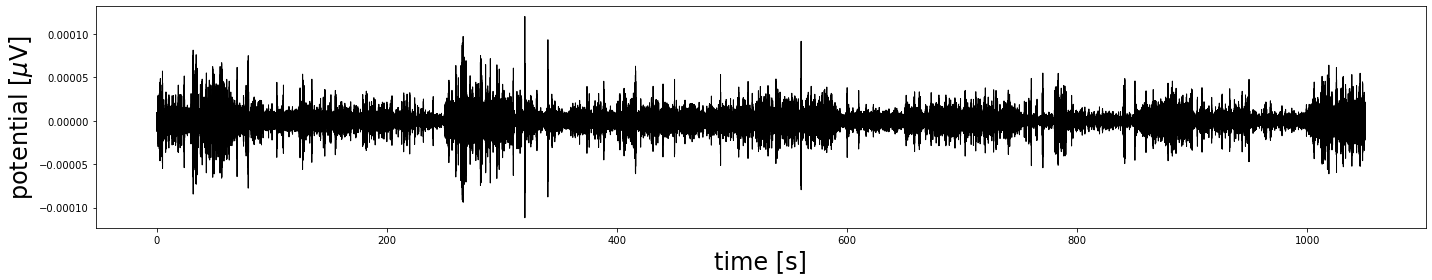

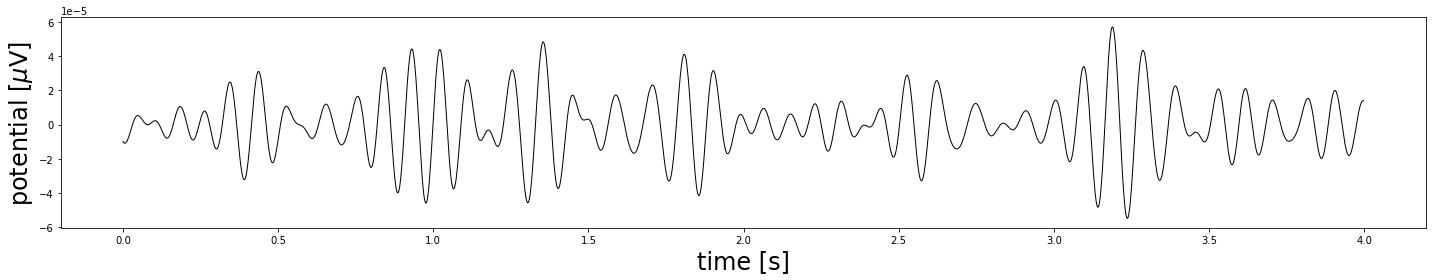

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 21880 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 33 iterations.
	K-means run 2/5 converged after 26 iterations.
	K-means run 3/5 converged after 15 iterations.
	K-means run 4/5 converged after 15 iterations.
	K-means run 5/5 converged after 34 iterations.
[+] Computation time: 5.40 sec

[+] Microstate back-fitting:
data_norm:  (525105, 64)
data_cluster_norm:  (21880, 64)
maps:  (4, 64)

[+] Global explained variance GEV = 0.521
GEV_0: 0.097
GEV_1: 0.209
GEV_2: 0.132
GEV_3: 0.083

Empirical symbol distribution (RTT):

p_0 = 0.303
p_1 = 0.314
p_2 = 0.185
p_3 = 0.198

Empirical transition matrix:

|0.8950.0440.0250.036|
|0.0410.9020.0260.031|
|0.0450.0400.8860.029|
|0.0540.0510.0260.869|

GFP peaks per sec.: 20.83

Global explained variance (GEV) per map:
GEV(ms-0) = 0.10
GEV(ms-1) = 0.21
GEV(ms-2) = 0.13
GEV(ms-3) = 0.08

total GEV: 0.521

Empirical entropy H = 1.36 (max

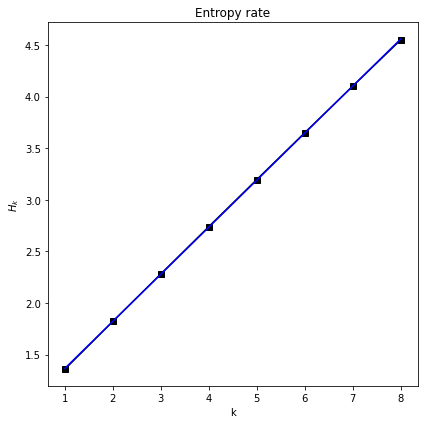


Empirical entropy rate h = 0.46
Theoretical MC entropy rate h = 0.46
The lzc:
(21,)
[2131, 2170, 2183, 2162, 2176, 2130, 2192, 2144, 2159, 2158, 2003, 2087, 2132, 2166, 2099, 1912, 2006, 2123, 2056, 2090, 3]


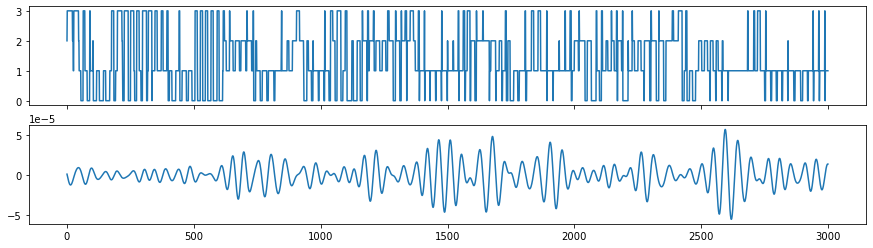

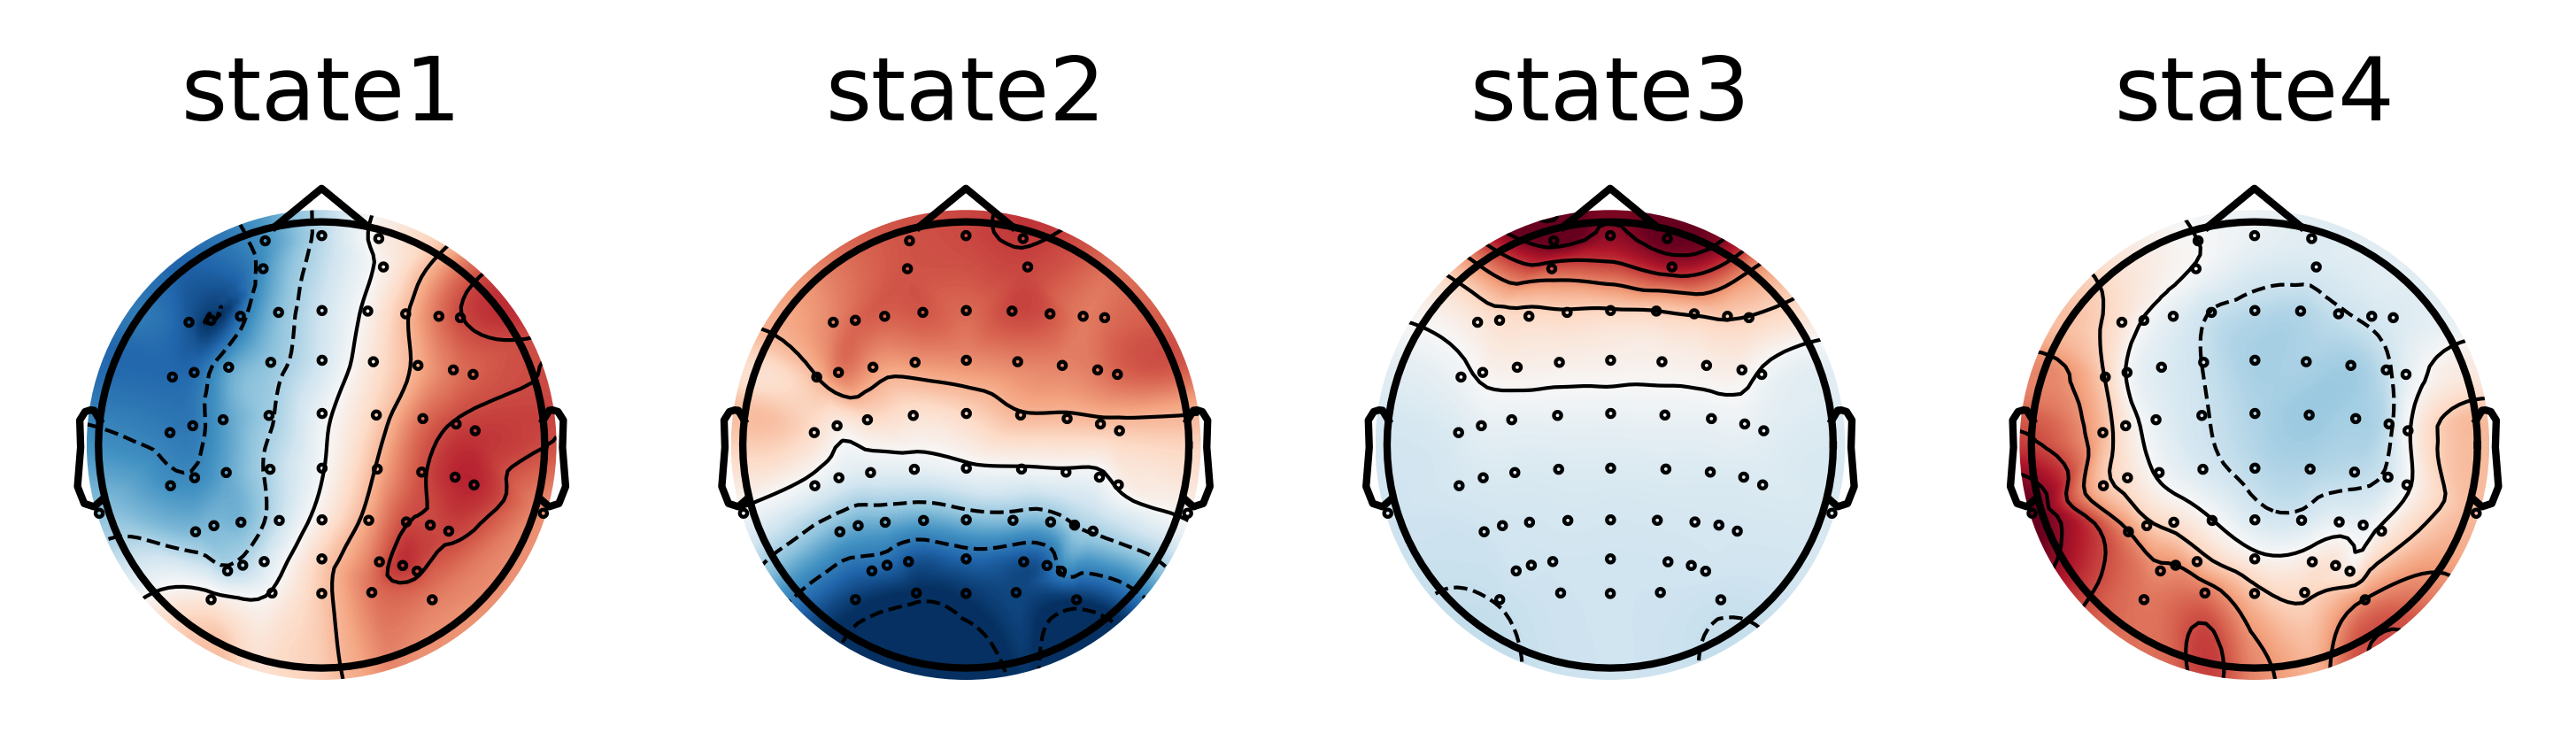

In [4]:
from langouEEG import *
vars_4R = display_maps(epoch_4R, n_maps=4, save=True, dpi=600, filename='40Hz_rest',
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=True, epochs=epochs_4R,save_log=save_log, f_lo=8, f_hi=13)

(357102, 64)


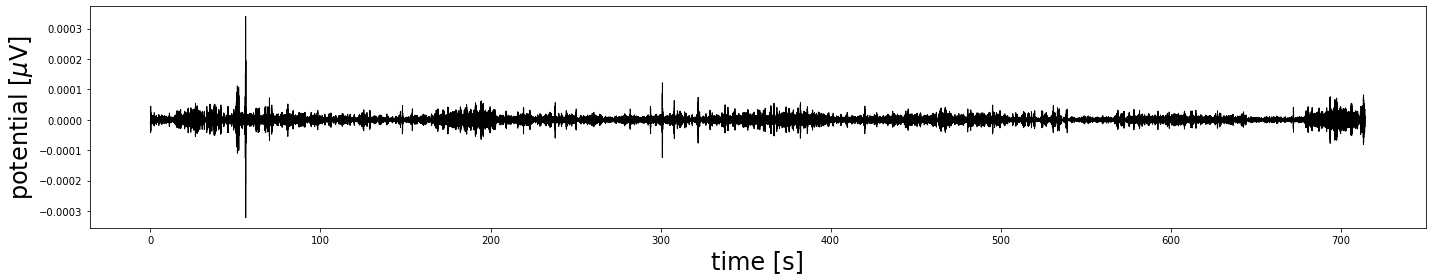

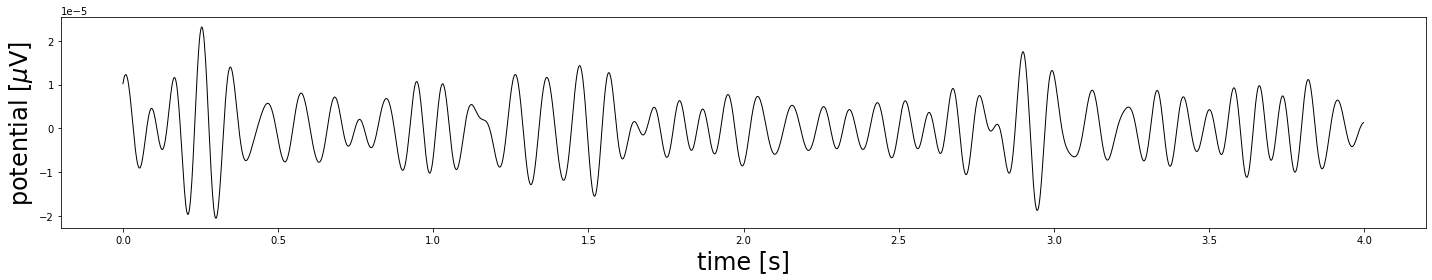

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 15016 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 20 iterations.
	K-means run 2/5 converged after 34 iterations.
	K-means run 3/5 converged after 20 iterations.
	K-means run 4/5 converged after 22 iterations.
	K-means run 5/5 converged after 37 iterations.
[+] Computation time: 4.95 sec

[+] Microstate back-fitting:
data_norm:  (357102, 64)
data_cluster_norm:  (15016, 64)
maps:  (4, 64)

[+] Global explained variance GEV = 0.542
GEV_0: 0.160
GEV_1: 0.093
GEV_2: 0.129
GEV_3: 0.159

Empirical symbol distribution (RTT):

p_0 = 0.266
p_1 = 0.301
p_2 = 0.272
p_3 = 0.161

Empirical transition matrix:

|0.8870.0450.0430.025|
|0.0400.8840.0490.028|
|0.0420.0540.8760.027|
|0.0410.0510.0470.860|

GFP peaks per sec.: 21.02

Global explained variance (GEV) per map:
GEV(ms-0) = 0.16
GEV(ms-1) = 0.09
GEV(ms-2) = 0.13
GEV(ms-3) = 0.16

total GEV: 0.542

Empirical entropy H = 1.36 (max

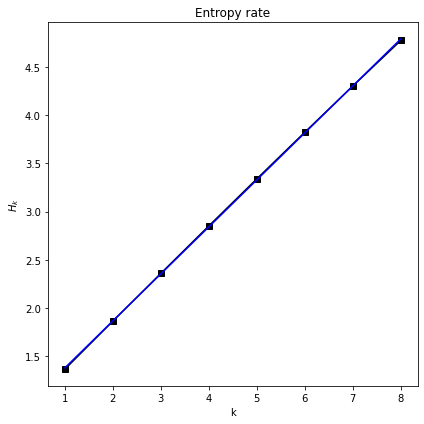


Empirical entropy rate h = 0.49
Theoretical MC entropy rate h = 0.50
The lzc:
(21,)
[1590, 1582, 1642, 1624, 1640, 1651, 1650, 1604, 1596, 1628, 1640, 1554, 1628, 1590, 1582, 1518, 1550, 1617, 1533, 1631, 2]


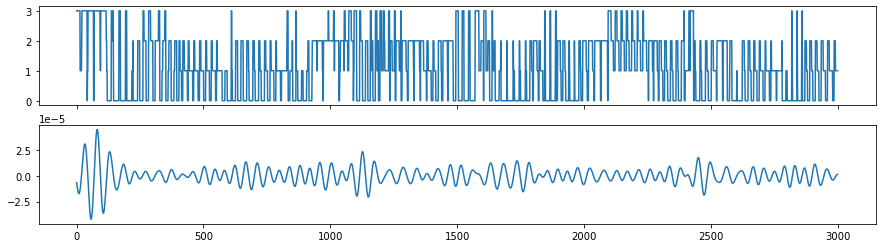

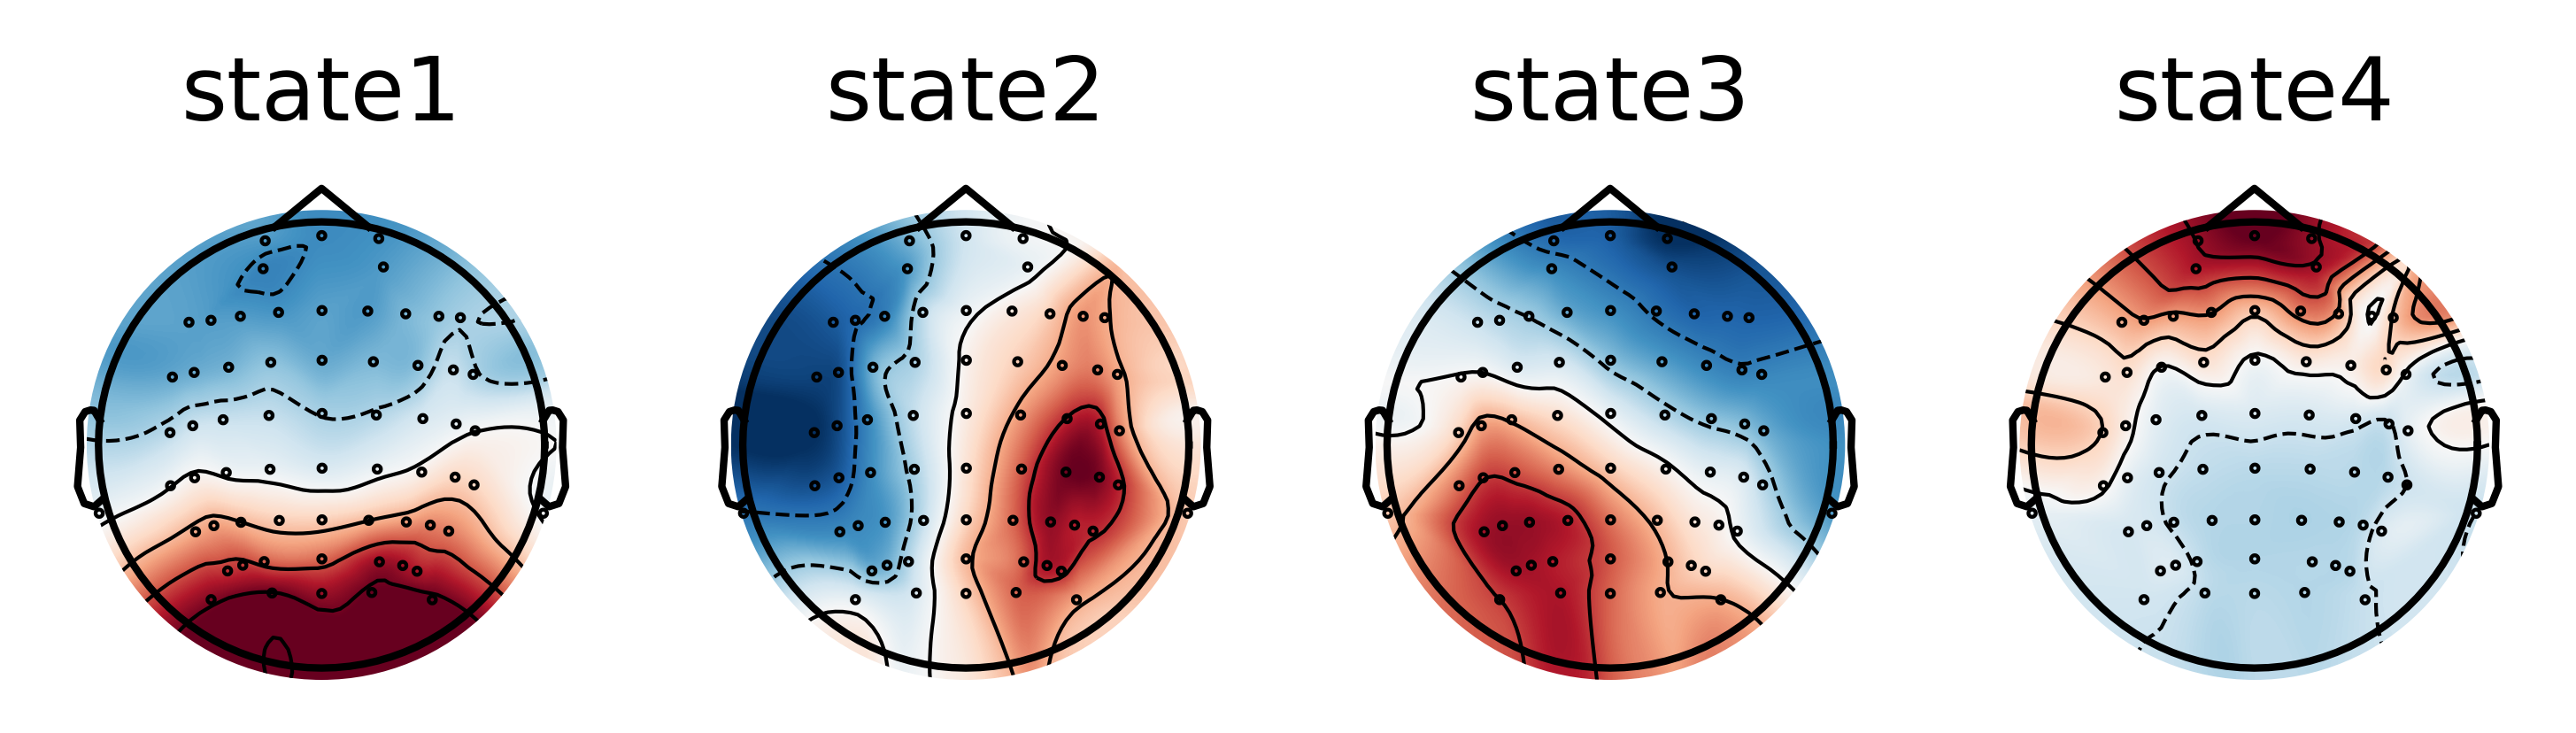

In [5]:
vars_4F = display_maps(epoch_4F, n_maps=4, save=True, dpi=600, filename='40Hz_flicker', 
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=True, epochs=epochs_4F,save_log=save_log,f_lo=8, f_hi=13)

(95095, 64)


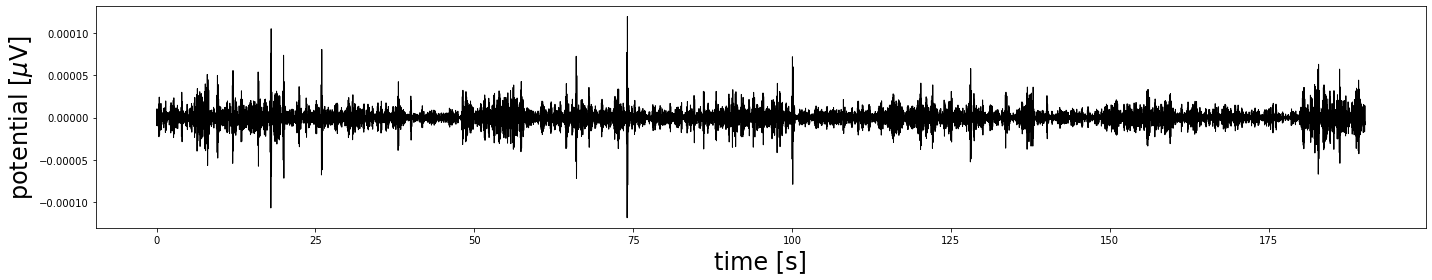

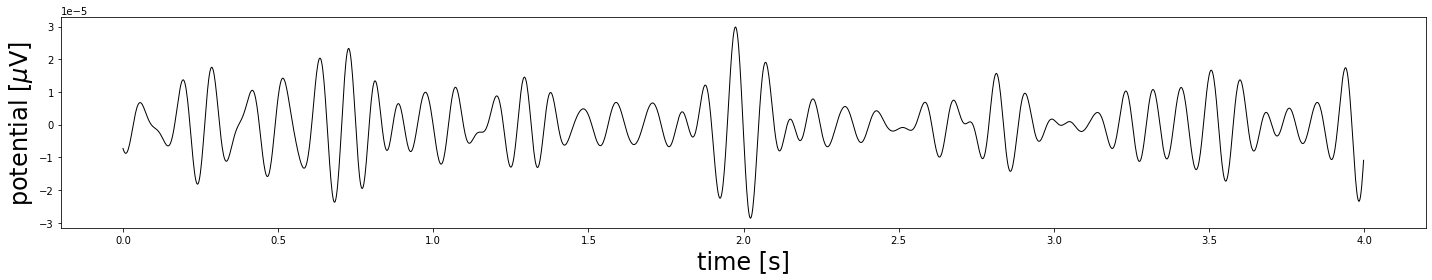

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 3966 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 21 iterations.
	K-means run 2/5 converged after 29 iterations.
	K-means run 3/5 converged after 10 iterations.
	K-means run 4/5 converged after 27 iterations.
	K-means run 5/5 converged after 16 iterations.
[+] Computation time: 1.70 sec

[+] Microstate back-fitting:
data_norm:  (95095, 64)
data_cluster_norm:  (3966, 64)
maps:  (4, 64)

[+] Global explained variance GEV = 0.498
GEV_0: 0.089
GEV_1: 0.281
GEV_2: 0.065
GEV_3: 0.063

Empirical symbol distribution (RTT):

p_0 = 0.360
p_1 = 0.542
p_2 = 0.024
p_3 = 0.074

Empirical transition matrix:

|0.9040.0740.0040.017|
|0.0510.9300.0040.015|
|0.0580.0920.8280.022|
|0.0770.1190.0060.798|

GFP peaks per sec.: 20.85

Global explained variance (GEV) per map:
GEV(ms-0) = 0.09
GEV(ms-1) = 0.28
GEV(ms-2) = 0.07
GEV(ms-3) = 0.06

total GEV: 0.498

Empirical entropy H = 0.98 (max. e

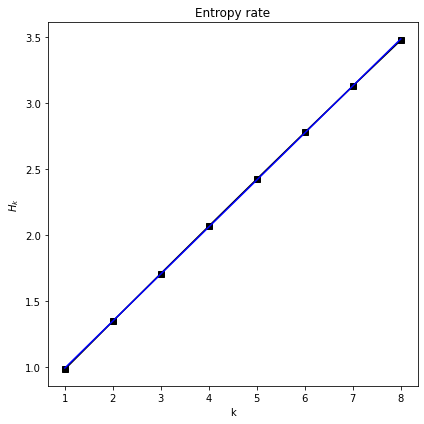


Empirical entropy rate h = 0.36
Theoretical MC entropy rate h = 0.36
The lzc:
(21,)
[445, 418, 438, 418, 422, 422, 406, 401, 425, 416, 402, 418, 386, 438, 417, 430, 417, 429, 439, 437, 5]


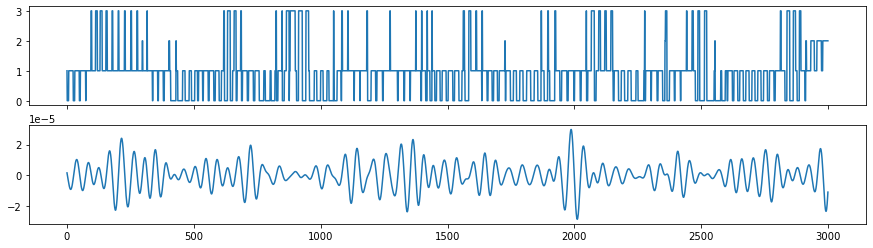

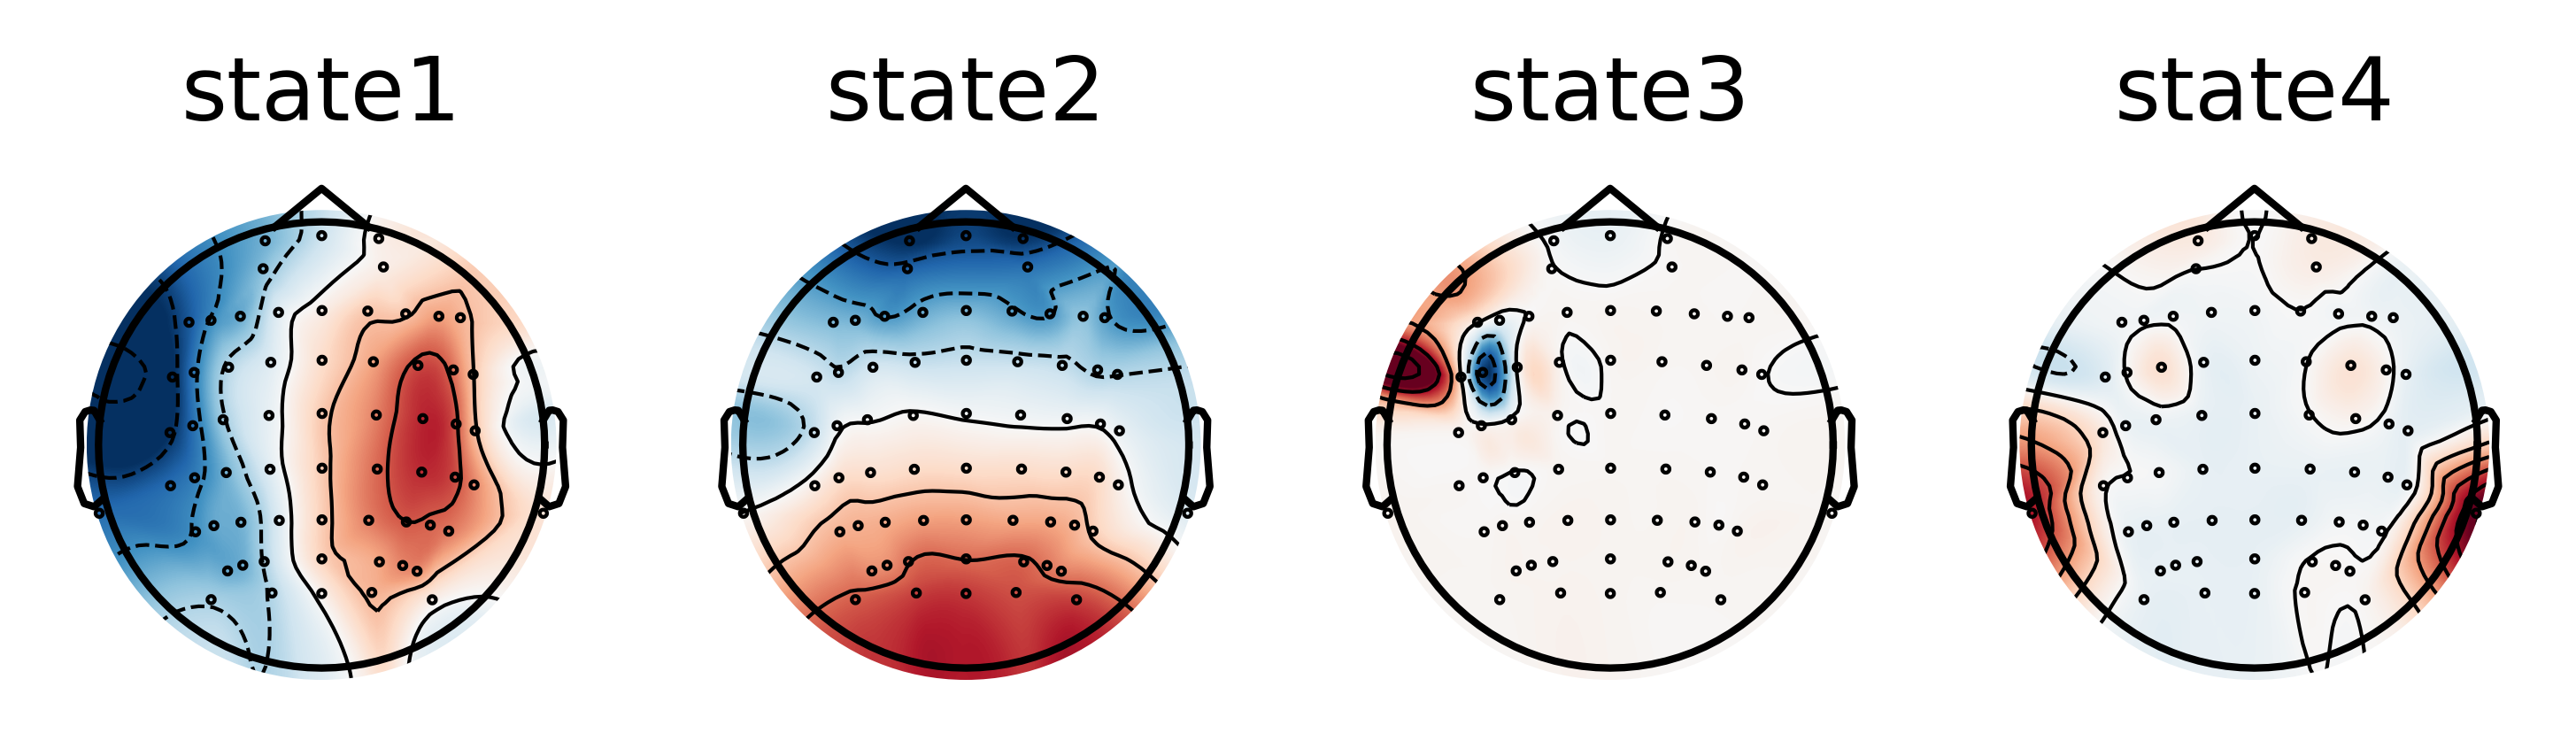

In [7]:
vars_RF = display_maps(epoch_RF, n_maps=4, save=True, dpi=600, filename='random_flicker', 
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=True, epochs=epochs_RF,save_log=save_log,f_lo=8, f_hi=13)